<h1>CS786 Assignment-1
<br>Manasvi Kweera (210582)<h1>

##Q1:- Writing our own Hopfield network model <h2>

The model is the same as that provided in the assignment question.

In [ ]:
# installing Neurodynex3 to import necessary libraries
!pip install neurodynex3

In [2]:
# importing the required libraries and functions
import random
import numpy as np
import math
from copy import deepcopy
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

The function below creates a list of random patterns with specified dimensions.

In [3]:
def get_patterns(pattern_size, pattern_num):
  plist = []
  for i in range(pattern_num):
    lis2 = []
    for j in range(pattern_size):
      lis1 = []
      for k in range(pattern_size):
        lis1.append(random.choice([-1,1]))
      lis2.append(lis1)
    plist.append(lis2)
  return (plist)

The function below perturbs a pattern by flipping a set number of bits.





In [4]:
def perturb_pattern(pattern, perturb_n):
  rand = random.sample(range(len(pattern)**2), perturb_n)
  for i in range(perturb_n):
    a = math.trunc(rand[i]/len(pattern))
    b = rand[i]%len(pattern)
    pattern[a][b] = pattern[a][b]*-1
  return (pattern)

The function below takes in a state S_0 and returns the following state, denoted by S_1 after successfull updation of each node in the graph according to the following rule:-
$$S_i(t+1) = sgn\left(\sum_j{w_{ij} S_j(t)}\right) $$

In [5]:
def network_evolution(S,wghts):
  Splus1 = deepcopy(S)
  for i in range(len(S)**2):
    sum=0
    for j in range(len(S)**2):
      sum = sum + wghts[i][j]*S[math.trunc(j/len(S))][j%len(S)]
    Splus1[math.trunc(i/len(S))][i%len(S)] = np.sign(sum)
  return Splus1

The weight of every synaptic connection is calculated as,

$$w_{ij} = \frac{1}{N} \sum_{\mu}{p_i^\mu p_j^\mu}, $$

where $N$ is the number of neurons, and $p_i^\mu$ is the state of the $i^{th}$ neuron for encoding pattern $\mu$.

In [6]:
def compute_weights(plist, pattern_size):
  wghts = []
  for i in range(pattern_size**2):
    w = []
    for j in range(pattern_size**2):
      sum = 0
      if(i!=j):
        for k in range(len(plist)):
          sum = sum + plist[k][math.trunc(i/pattern_size)][i%pattern_size] * plist[k][math.trunc(j/pattern_size)][j%pattern_size]
      w.append(sum/pattern_size**2)
    wghts.append(w)
  return wghts

The function below is the implementation of the Hopfield Network.

In [7]:
def Hopfield_Network(pattern_size, num_pattern, pertubation_count, evolution_count):
  plist = get_patterns(pattern_size, num_pattern)
  cue = deepcopy(plist)
  wghts = compute_weights(plist, pattern_size)

  perturbed_pattern = perturb_pattern(cue[0],pertubation_count)
  state_list = [perturbed_pattern]

  S_itr = deepcopy(perturbed_pattern)
  for i in range(evolution_count):
      S_itr = network_evolution(S_itr,wghts)
      state_list.append(S_itr)

  plist_array = np.array(plist)
  state_list_array = np.array(state_list)
  cue_array = np.array(cue)

  return plist_array, perturbed_pattern, state_list_array

In [8]:
def plot_Hopfield(plist, cue, state_list):
  print('\nThe Patterns generated are:\n')
  plot_tools.plot_pattern_list(plist)
  print('\n\nThe Pertubed Pattern (noisy input to network) is:\n')
  plot_tools.plot_pattern(cue)
  print('\n\nThe Evolution of the Network is:')
  plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle="Network dynamics")


The Patterns generated are:



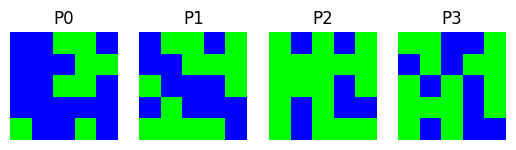



The Pertubed Pattern (noisy input to network) is:



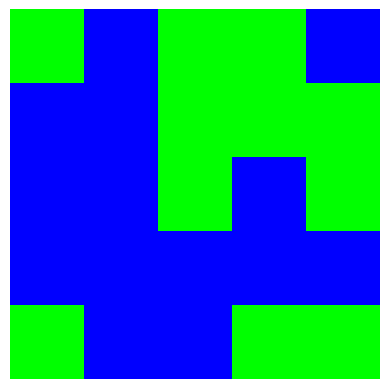



The Evolution of the Network is:



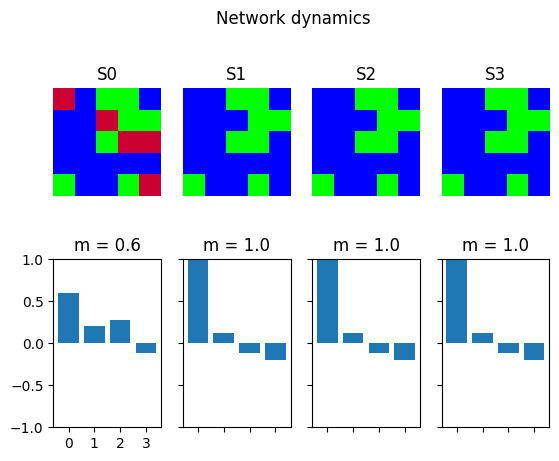

In [9]:
plist, perturbed_pattern, state_list = Hopfield_Network(pattern_size = 5, num_pattern = 4, pertubation_count = 5, evolution_count = 3)
plot_Hopfield(plist, perturbed_pattern, state_list)

## Q2:- Running the model on different parameters:



###a) The informativeness of the cue:<br>

The informativeness of the cue decreases as more bits are flipped, causing greater deviation from the reference pattern.

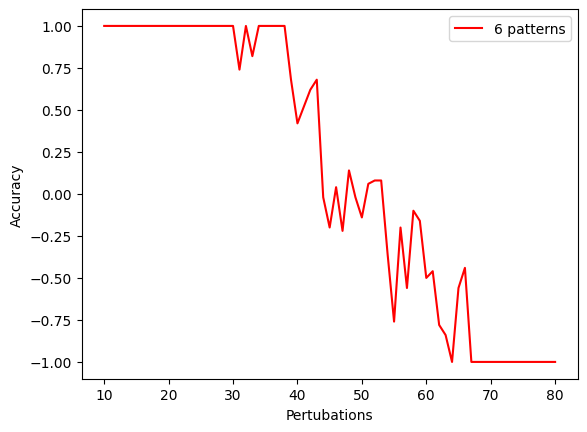

In [10]:
accuracy_cue = []
perturbation_values = range(10,81)
for i in range(10,81):
  plist, cue, state_list = Hopfield_Network(pattern_size = 10, num_pattern = 6, pertubation_count = i, evolution_count = 3)
  overlap = pattern_tools.compute_overlap(state_list[-1], plist[0])
  accuracy_cue.append(overlap)

plt.xlabel('Pertubations')
plt.ylabel('Accuracy')
plt.plot(perturbation_values, accuracy_cue,'r',label = '6 patterns')

plt.legend()
plt.show()

The graph confirms that as noise increases, the model struggles more to retrieve the original pattern. This is because the associations stored in the weight matrix weaken with increased noise, making it harder for the model to accurately reproduce the original pattern.

---





###b) The number of other patterns stored in the network:<br>

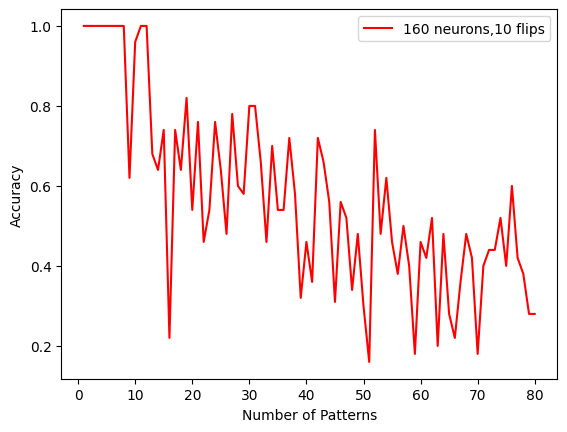

In [11]:
accuracy_npatterns = []
n_patterns = range(1,81)

for i in range(2,82):
  plist, cue, state_list = Hopfield_Network(pattern_size = 10, num_pattern = i, pertubation_count = 25, evolution_count = 3)
  overlap = pattern_tools.compute_overlap(state_list[-1], plist[0])
  accuracy_npatterns.append(overlap)


plt.xlabel('Number of Patterns')
plt.ylabel('Accuracy')
plt.plot(n_patterns, accuracy_npatterns,'r',label = '160 neurons,10 flips')

plt.legend()
plt.show()

Over time,we see a clear downward trend .i.e a clear decline in the model's ability to retrieve the original state is observed as the number of patterns increases. Increasing the number of patterns, while keeping the network size constant, limits the network's memory capacity and increases the data load, significantly reducing performance in terms of overlap with the reference pattern.

---



###c) The size of the network, given by the size of the patterns:<br>

In [13]:
accuracy_size = []

nueron_num = [k**2 for k in range(10,31)]
pert_perc = [0.3,0.4,0.5,0.6,0.7]

for j in pert_perc:
  o=[]
  for i in range(10,31):
    plist, cue, state_list = Hopfield_Network(pattern_size = i, num_pattern = 10, pertubation_count = int(j*(i**2)), evolution_count = 3)
    overlap = pattern_tools.compute_overlap_list(state_list[-1], plist)
    o.append(max(overlap))
  accuracy_size.append(o)

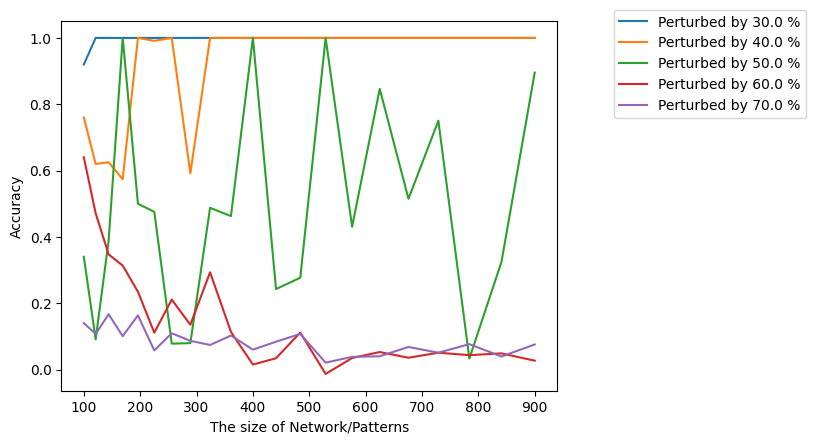

In [14]:

plt.xlabel('The size of Network/Patterns')
plt.ylabel('Accuracy')
for j in range(len(accuracy_size)):
  t = 'Perturbed by '+ str(pert_perc[j]*100) +' %'
  plt.plot(nueron_num, accuracy_size[j],label = t)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()



For low perturbation levels less than 50%, network performance remains stable or even improves with increasing network size, while for higher perturbation levels, performance sharply declines. This is because, as the number of neurons increases, the network's memory associations become more retrievable, leading to better overlap with the reference pattern, provided the perturbation is manageable.

##Q3:- Converting MNIST digit data into Patterns

In [15]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
import matplotlib.pyplot as plt
import numpy as np

The below function shrinks Grayscale image to half its size (28x28 to 14x14)


In [17]:
def shrink(img):
  shrinked = []
  for i in range(math.trunc(img.shape[0]/2)):
    l = []
    for j in range(math.trunc(img.shape[1]/2)):
      t = ( int(img[2*i][2*j]) + int(img[2*i][2*j+1]) + int(img[2*i+1][2*j]) + int(img[2*i+1][2*j+1]) )/4
      l.append(t)
    shrinked.append(l)
  return np.array(shrinked)

The below function convert the shrinked img to binary

In [22]:
def convert_for_Hopfield(orig_array):
  arr = np.empty((orig_array.shape[0],14,14), dtype=int)
  for i in range(arr.shape[0]):
    arr[i] = shrink(orig_array[i])
    for j in range(arr.shape[1]):
      for k in range(arr.shape[2]):
        if(arr[i][j][k]>127): arr[i][j][k]=1
        else: arr[i][j][k]=-1
  return arr

The below function converts images to binary without shrinking their size

In [19]:
def convert_for_HopfieldNS(orig_array):
  arr = np.empty((orig_array.shape[0],28,28), dtype=int)
  for i in range(arr.shape[0]):
    arr[i] = orig_array[i]
    for j in range(arr.shape[1]):
      for k in range(arr.shape[2]):
        if(arr[i][j][k]>127): arr[i][j][k]=1
        else: arr[i][j][k]=-1
  return arr

The below function removes blank rows and columns around the data


In [20]:
def crop(orig_array):
  arr = np.empty((orig_array.shape[0],8,8), dtype=int)
  for i in range(orig_array.shape[0]):
    arr[i] = orig_array[i, 3:11, 3:11]
  return arr

The below function converts the loaded data to the required form


In [23]:
x_test_hop = convert_for_Hopfield(x_test)
x_test_hopns = convert_for_HopfieldNS(x_test)
x_train_hop = convert_for_Hopfield(x_train)
x_train_hopns = convert_for_HopfieldNS(x_train)

The below function crops the above data to get the final form to be used

In [24]:
x_train_final = crop(x_train_hop)
x_test_final = crop(x_test_hop)

Printing Random converted images from the dataset

  Original |   Binary  | Shrinked  | Cropped


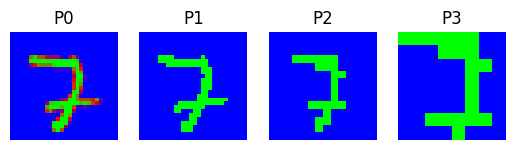

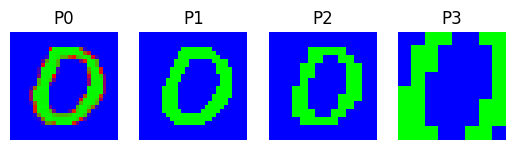

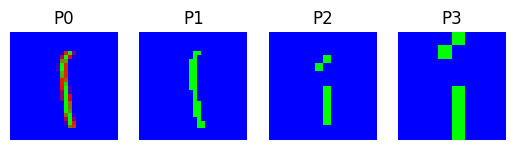

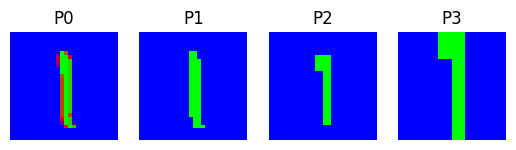

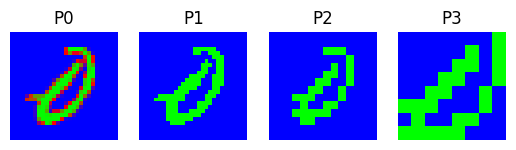

In [25]:
indxs = random.sample(range(60000), 5)
print('  Original |   Binary  | Shrinked  | Cropped')
for k in indxs:
  conv_patterns = [x_train[k], x_train_hopns[k], x_train_hop[k], x_train_final[k]]
  plot_tools.plot_pattern_list(conv_patterns)

##Q4:- Writing an MNIST classifier using the Hopfield network

The Hopfield Network was trained with just 20 images (2 per digit) to avoid reduced performance and high computational costs associated with larger sample sizes, which significantly increase runtime.

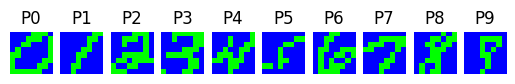

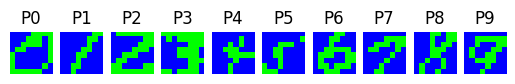

In [26]:
x_train_imgs = []

j=0
for k in range(2):
  i=0
  while j < (x_train_final.shape[0]):
      if(y_train[j]==i):
        x_train_imgs.append(x_train_final[j])
        i+=1
      j+=1
      if(i==10): break

plot_tools.plot_pattern_list(x_train_imgs[:10])
plot_tools.plot_pattern_list(x_train_imgs[10:])

The two set of digits

In [27]:
weights = compute_weights(x_train_imgs, 8)

In [28]:
# Defining a function to predict the label of the pattern
def classify_pattern(pattern, train_array):
  pred = 0
  max = -1
  for i in range(len(train_array)):
    overlap = pattern_tools.compute_overlap(pattern, train_array[i])
    if(overlap>max):
      max = overlap
      pred = i
  return pred

In [29]:
correct_predictions = 0

for i in range(len(x_test_final)):
  S_itrs = deepcopy(x_test_final[i])
  for j in range(3):
    S_itrs = network_evolution(S_itrs,weights)
  pred = classify_pattern(S_itrs,x_train_imgs)
  if (pred==y_test[i]):
    correct_predictions+=1

correct_predictions

1353

In [30]:
print('The Accuracy of the Hopfield Classifier on MNIST Digit Data is: ', (correct_predictions*100) / len(x_test_final) ,' %')

The Accuracy of the Hopfield Classifier on MNIST Digit Data is:  13.53  %


The model has an accuracy of 13.53%, F Score is generally calculated for Binary classification. To do this we select a class (0 here) and the values are predicted as 0 or 1 (not 0)

---



In [31]:
def Fscore(TP, FP, FN):
  denominator = TP+ 0.5*(FP+FN)
  return TP/denominator

TP = 0      # True Positive
FP = 0      # False Positive
FN = 0      # False Negative

for i in range(len(x_test_final)):
  S_itrs = deepcopy(x_test_final[i])
  for j in range(3):
    S_itrs = network_evolution(S_itrs,weights)
  pred = classify_pattern(S_itrs,x_train_imgs)
  if (y_test[i]==0 and pred==0):
    TP+=1
  elif(y_test[i]==0 and pred!=0):
    FN+=1
  elif(y_test[i]!=0 and pred==0):
    FP+=1

print('F-SCORE: ', Fscore(TP,FP,FN))

F-SCORE:  0.47375


Careful pre-processing steps are neccesary  to achieve F score of 0.47. Without these steps, the model's accuracy was around 10-11%, and it often converged to the same label for all test data, likely due to high correlation between learned patterns and other labels.

### Comparison with other deep and classical learning models:

They usually outperform hopfield models. Hopfield mmodels usually have f-score in range 0.25-0.5.
Classical models like Random forest, Simple one-layer neural network,
Simple 2 layer convolutional network and SVM-RBF have an accuracy above 90% (Mostly 93%-98%). Their F-Scores correspondingly are also generally greater than 0.9.
Deep Learning Models have achieved accuracies higher than 99% and have also managed to achieve better F-Scores than Classical Models.

Our Hopfield Model has an accuracy of 13.53% and an F-Score of 0.47, which are significantly lower compared to the accuracy achieved by the supervised learning models.

---




###Hopfield as a Classifier

Merits:

*   The Hopfield network is advantageous due to its simplicity in both implementation and understanding.
* It works well with a small amount of data, making it suitable for scenarios with limited samples.
* The algorithm is straightforward to implement and does not require extensive memory, making it less resource-intensive.
* It performs effectively when the number of patterns stored is small, which is beneficial for few-shot learning.
* Additionally, the network does not require labels during training, which is useful when labels are scarce. Its flexibility allows it to be used for both unsupervised and supervised learning tasks.
<br>

Demerits:

*   The Hopfield network requires significant pre-processing of data to function effectively, which adds to the complexity of its application.
* It can be computationally expensive, especially when dealing with large datasets, making it less practical for extensive use.
* The performance of the Hopfield network is generally lower than that of other supervised learning models, particularly in image classification tasks.
* It has limited capacity to learn from a large number of samples or patterns and struggles with patterns that differ significantly from the training data.
* Additionally, the model assumes symmetrical weight matrices, which is not biologically realistic, and its restriction to +1/-1 states can lead to data loss, particularly with images involving shading or color.
* The model also has difficulty distinguishing between patterns that are only slightly different, and high correlation among patterns can lead to poor performance.

# References

* [Reseacrh paper on Classification of handwritten digits using the Hopfield network](https://www.researchgate.net/publication/341712078_Classification_of_handwritten_digits_using_the_Hopfield_network)

* [MNIST image classification](https://paperswithcode.com/sota/image-classification-on-mnist)
*   [Demerits](https://skedbooks.com/books/neural-network-fuzzy-systems/limitations-to-using-the-hop)
*   [Hopfield Networks](https://www.youtube.com/watch?v=81B-ESqgCjs&t=1672s)
* Lecture slides - CS786 (Nisheeth Srivastava)
